In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from maze_ga import MazeGa
from display import show_solution
import seaborn as sns
import numpy as np

In [44]:
runs = pd.read_csv('./seminar_1/results/runs.csv', index_col=0)
runs.head()

,maze_file,generations,valid_only,population_size,parents,mutation_probability,elitism,use_custom_functions,run_id
0,maze_1.txt,150,True,25,0.07,0.01,0.01,True,21
1,maze_1.txt,150,True,25,0.01,0.01,0.01,True,1
2,maze_1.txt,150,True,25,0.01,0.01,0.10,True,2
3,maze_1.txt,150,True,25,0.07,0.01,0.10,True,22
4,maze_1.txt,150,True,25,0.25,0.01,0.01,True,81


In [3]:
gen_scores = pd.read_csv('./seminar_1/results/generations_scores.csv', index_col=0)
gen_scores.head()

,run_id,generation,fitness,path
0,21,0,79.6,1021120012303113001122023
1,21,1,83.8,1021120231010013301213232
2,21,2,83.8,1021120230332212323100310
3,21,3,79.6,1021120012303112001031223
4,21,4,87.8,1021223133230021130120201


In [4]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38005 entries, 0 to 38004
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   maze_file             38005 non-null  object 
 1   generations           38005 non-null  int64  
 2   valid_only            38005 non-null  bool   
 3   population_size       38005 non-null  int64  
 4   parents               38005 non-null  float64
 5   mutation_probability  38005 non-null  float64
 6   elitism               38005 non-null  float64
 7   use_custom_functions  38005 non-null  bool   
 8   run_id                38005 non-null  int64  
dtypes: bool(2), float64(3), int64(3), object(1)
memory usage: 2.4+ MB


In [5]:
gen_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654126 entries, 0 to 2654125
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   run_id      int64  
 1   generation  int64  
 2   fitness     float64
 3   path        object 
dtypes: float64(1), int64(2), object(1)
memory usage: 101.2+ MB


In [6]:
def condition(maze_file, generations, valid_only, population_size, parents, mutation_probability, elitism, use_custom_functions):
    condition = (runs.maze_file == maze_file)
    if generations is not None:
        condition = condition & (runs.generations == generations)
    if valid_only is not None:
        condition = condition & (runs.valid_only == valid_only)
    if population_size is not None:
        condition = condition & (runs.population_size == population_size)
    if parents is not None:
        condition = condition & (runs.parents == parents)
    if mutation_probability is not None:
        condition = condition & (runs.mutation_probability == mutation_probability)
    if elitism is not None:
        condition = condition & (runs.elitism == elitism)
    if use_custom_functions is not None:
        condition = condition & (runs.use_custom_functions == use_custom_functions)
    return condition


In [7]:
runs.loc[condition("maze_5.txt", 150, False, 250, 0.25, 0.01, 0.01, False)]

,maze_file,generations,valid_only,population_size,parents,mutation_probability,elitism,use_custom_functions,run_id
16978,maze_5.txt,150,False,250,0.25,0.01,0.01,False,14973


### Maze 5 Score by Generation (Basic Parameters)

In [8]:
run_id = int(runs.loc[condition("maze_5.txt", 150, False, 25, 0.25, 0.01, 0.1, False)]["run_id"])
run_scores = gen_scores.loc[gen_scores.run_id == run_id]

Text(0.5, 1.0, 'maze_5 without custom functions')

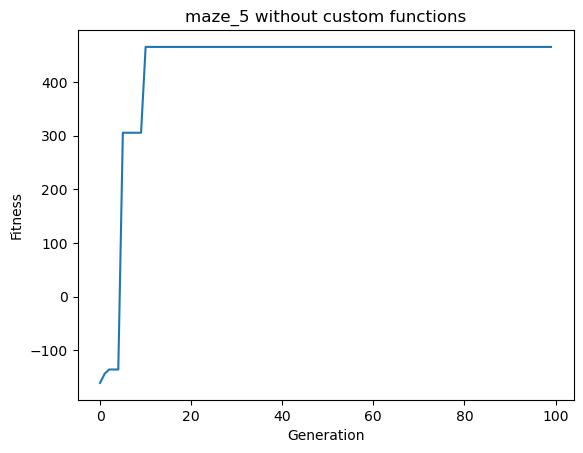

In [9]:
plt.plot(run_scores.generation[:100], run_scores.fitness[:100])
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("maze_5 without custom functions")

In [10]:
last_solution = run_scores.loc[run_scores.generation == 150]

In [11]:
with open("./seminar_1/mazes/maze_5.txt", "r") as m:
    maze_string = m.read()
mga = MazeGa(maze_string)

In [12]:
solution_path = mga.path_str_to_list(last_solution.path.values[0])

In [13]:
show_solution(mga, solution_path, last_solution.fitness.values[0], sequential_display=False)

-----------------------------------
Current score 465.4
D D L L D D L U U D D D U U L U U R R U U L L R U R U L R U D R U U D R U U D L L U L D L R D D U L D D U U D D L L U D D R R U D U U L L R L D D D U R R R U R U R U R D R D R R L L U U R U L D D D D L L U D U R R R L U L D R D D U U L D U L L R U U U L R D U L L D D D L R U D U U L D L L D U 
###x###########
#..xxxxxx###..#
########x....##
#.....##x###.##
#.###...xx##..#
#.....###xxx###
####.####x#x###
##......#xxxxx#
#######.#x###.#
#.....xxxx#####
#.####xx#....##
##.xxx#x#######
#..##xxx......#
##...###.##.###
###############



### Maze 5 Score By Generation (Advanced Parameters)

In [14]:
run_id = int(runs.loc[condition("maze_5.txt", 150, True, 25, 0.25, 0.01, 0.1, True)]["run_id"])
run_scores = gen_scores.loc[gen_scores.run_id == run_id]

Text(0.5, 1.0, 'maze_5 with custom functions')

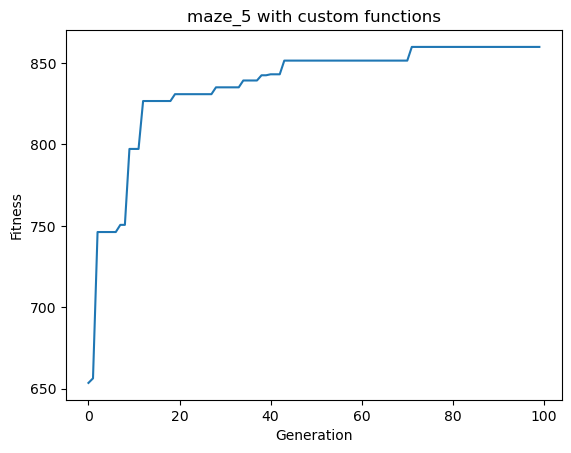

In [15]:
plt.plot(run_scores.generation[:100], run_scores.fitness[:100])
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("maze_5 with custom functions")

In [16]:
last_solution = run_scores.loc[run_scores.generation == 150]

In [17]:
solution_path = mga.path_str_to_list(last_solution.path.values[0])

In [18]:
show_solution(mga, solution_path, last_solution.fitness.values[0], sequential_display=False)

-----------------------------------
Current score 864.0
U R R U U U U U L U U U L L L L L U 
###x###########
#..xxxxxx###..#
########x....##
#.....##x###.##
#.###...xx##..#
#.....###x..###
####.####x#.###
##......#x....#
#######.#x###.#
#......xxx#####
#.####.S#....##
##....#.#######
#..##.........#
##...###.##.###
###############



Text(0.5, 1.0, 'time vs maze size')

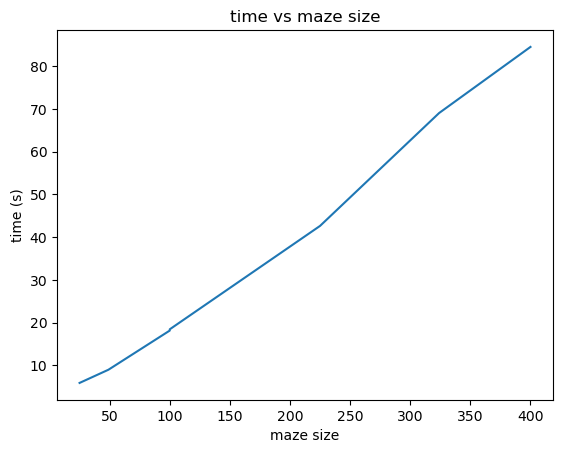

In [19]:
size = [25, 49, 100, 100, 225, 324, 400]
side_len = np.sqrt(size)
time = [5.920, 9.005, 18.163, 18.455, 42.635, 69.021, 84.479]

plt.plot(size, time)
plt.xlabel("maze size")
plt.ylabel("time (s)")
plt.title("time vs maze size")

In [76]:
curr = runs.loc[condition("maze_5.txt", 150, True, None, 0.13, 0.01, 0.01, True)]

In [77]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 14067 to 15417
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   maze_file             10 non-null     object 
 1   generations           10 non-null     int64  
 2   valid_only            10 non-null     bool   
 3   population_size       10 non-null     int64  
 4   parents               10 non-null     float64
 5   mutation_probability  10 non-null     float64
 6   elitism               10 non-null     float64
 7   use_custom_functions  10 non-null     bool   
 8   run_id                10 non-null     int64  
dtypes: bool(2), float64(3), int64(3), object(1)
memory usage: 660.0+ bytes


In [85]:
merged = pd.merge(curr[["run_id", "population_size"]], gen_scores, on="run_id")
merged = merged[(merged["population_size"] % 25 == 0) & (merged["population_size"] > 75)]
merged

,run_id,population_size,generation,fitness,path
453,12512,100,0,653.6,0120000003211111111221111320022002000020000331...
454,12512,100,1,696.0,0120000003211111111221111320022002000020000331...
455,12512,100,2,724.8,0120000011111102201013200113200022000221111311...
456,12512,100,3,758.8,0120011112211113200220020000111221111210103331...
457,12512,100,4,758.8,0120011112211113200220020000111221111210103331...
...,...,...,...,...,...
1505,13412,250,146,864.0,2112222202220000023101001232301100011102301001...
1506,13412,250,147,864.0,2112222202220000023101000101011001101100111001...
1507,13412,250,148,864.0,2112222202220000023101000111010001010101011230...
1508,13412,250,149,864.0,2112222202220000023101000101011001101100111001...


In [86]:
run_ids = merged["run_id"].unique()
run_ids

array([12512, 12662, 12812, 12962, 13112, 13262, 13412], dtype=int64)

Text(0.5, 1.0, 'Comparison of population sizes')

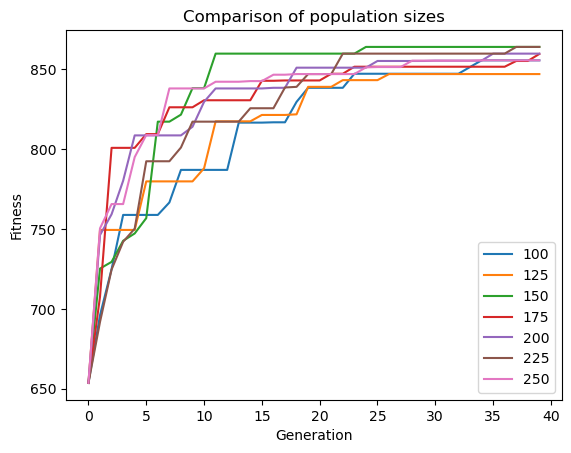

In [90]:
first_nth = 40
for rid in run_ids:
    plt.plot(merged.loc[merged["run_id"] == rid]["generation"][:first_nth], merged.loc[merged["run_id"] == rid]["fitness"][:first_nth], label=int(runs[runs["run_id"] == rid]["population_size"]))
plt.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Comparison of population sizes")

In [91]:
joined_tables = pd.merge(runs, gen_scores, on="run_id")

In [95]:
runs[runs["maze_file"] == "maze_7.txt"]

,maze_file,generations,valid_only,population_size,parents,mutation_probability,elitism,use_custom_functions,run_id
20005,maze_7.txt,150,True,25,0.01,0.01,0.00,True,18000
20006,maze_7.txt,150,True,25,0.01,0.01,0.00,False,18001
20007,maze_7.txt,150,True,25,0.01,0.01,0.01,True,18002
20008,maze_7.txt,150,True,25,0.01,0.01,0.01,False,18003
20009,maze_7.txt,150,True,25,0.01,0.01,0.10,True,18004
...,...,...,...,...,...,...,...,...,...
23000,maze_7.txt,150,False,250,0.25,0.10,0.00,False,20995
23001,maze_7.txt,150,False,250,0.25,0.10,0.01,True,20996
23002,maze_7.txt,150,False,250,0.25,0.10,0.01,False,20997
23003,maze_7.txt,150,False,250,0.25,0.10,0.10,True,20998


In [97]:
gen_scores[gen_scores["run_id"] == 20997]

,run_id,generation,fitness,path
